![alt text](https://trello-attachments.s3.amazonaws.com/56b4dc9a5618cc0446578ec6/5c6ffc4673fc7e8ac0a66708/c5f7d8d143f69ffd6683d6ad5b72c58f/Machine-Learning-e-Ciência-de-dados-nas-apostas-esportivas.png)

## Importando bibliotecas

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.style.use('default')

## Manipulando dados que serão utilizados

In [2]:
elo_df = pd.read_csv('dataset_elo_spain_v4.csv', sep=';')

In [3]:
elo_df

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,league,Date,home_elo,away_elo
0,Almeria,Espanol,A,2.80,3.30,2.50,Spain - La Liga Primera Division,2009-05-23,1710.323853,1706.179688
1,Betis,Sevilla,A,3.80,3.40,2.05,Spain - La Liga Primera Division,2017-02-25,1652.570068,1844.111328
2,Villarreal,Osasuna,A,1.57,3.75,6.00,Spain - La Liga Primera Division,2010-01-31,1757.755615,1703.363647
3,Granada,Sociedad,A,2.40,3.10,3.20,Spain - La Liga Primera Division,2015-09-22,1648.902710,1724.027222
4,Villarreal,Vallecano,H,1.60,4.20,5.50,Spain - La Liga Primera Division,2013-03-17,1662.804810,1700.998535
...,...,...,...,...,...,...,...,...,...,...
451,Villarreal,Elche,H,1.36,5.00,8.50,Spain - La Liga Primera Division,2015-05-10,1778.408081,1692.216431
452,Barcelona,Malaga,H,1.17,7.00,15.00,Spain - La Liga Primera Division,2010-02-27,1978.289673,1703.936646
453,Getafe,Levante,H,1.83,3.40,4.50,Spain - La Liga Primera Division,2013-11-29,1692.529053,1672.404663
454,Osasuna,Celta,D,2.90,3.10,2.60,Spain - La Liga Primera Division,2016-09-18,1616.232056,1745.238892


In [4]:
elo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 10 columns):
HomeTeam    456 non-null object
AwayTeam    456 non-null object
FTR         456 non-null object
B365H       456 non-null float64
B365D       456 non-null float64
B365A       456 non-null float64
league      456 non-null object
Date        456 non-null object
home_elo    456 non-null float64
away_elo    456 non-null float64
dtypes: float64(5), object(5)
memory usage: 35.8+ KB


In [5]:
elo_df_new = elo_df.copy()

In [6]:
elo_df_new['HomeElo/AwayElo'] = elo_df_new['home_elo'] / elo_df_new['away_elo']

In [7]:
elo_df_new

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,league,Date,home_elo,away_elo,HomeElo/AwayElo
0,Almeria,Espanol,A,2.80,3.30,2.50,Spain - La Liga Primera Division,2009-05-23,1710.323853,1706.179688,1.002429
1,Betis,Sevilla,A,3.80,3.40,2.05,Spain - La Liga Primera Division,2017-02-25,1652.570068,1844.111328,0.896134
2,Villarreal,Osasuna,A,1.57,3.75,6.00,Spain - La Liga Primera Division,2010-01-31,1757.755615,1703.363647,1.031932
3,Granada,Sociedad,A,2.40,3.10,3.20,Spain - La Liga Primera Division,2015-09-22,1648.902710,1724.027222,0.956425
4,Villarreal,Vallecano,H,1.60,4.20,5.50,Spain - La Liga Primera Division,2013-03-17,1662.804810,1700.998535,0.977546
...,...,...,...,...,...,...,...,...,...,...,...
451,Villarreal,Elche,H,1.36,5.00,8.50,Spain - La Liga Primera Division,2015-05-10,1778.408081,1692.216431,1.050934
452,Barcelona,Malaga,H,1.17,7.00,15.00,Spain - La Liga Primera Division,2010-02-27,1978.289673,1703.936646,1.161011
453,Getafe,Levante,H,1.83,3.40,4.50,Spain - La Liga Primera Division,2013-11-29,1692.529053,1672.404663,1.012033
454,Osasuna,Celta,D,2.90,3.10,2.60,Spain - La Liga Primera Division,2016-09-18,1616.232056,1745.238892,0.926081


## Gráfico de dispersão

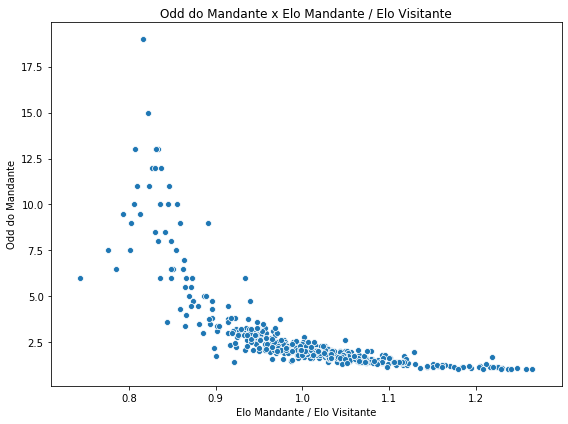

In [21]:
plt.rcParams['figure.figsize'] = [8, 6]
ax = sns.scatterplot(y='B365H', x='HomeElo/AwayElo', data=elo_df_new)
ax.set(ylabel='Odd do Mandante', xlabel='Elo Mandante / Elo Visitante', title='Odd do Mandante x Elo Mandante / Elo Visitante')
plt.tight_layout()
plt.savefig('odd_elo_score3_v2.png')
plt.show()

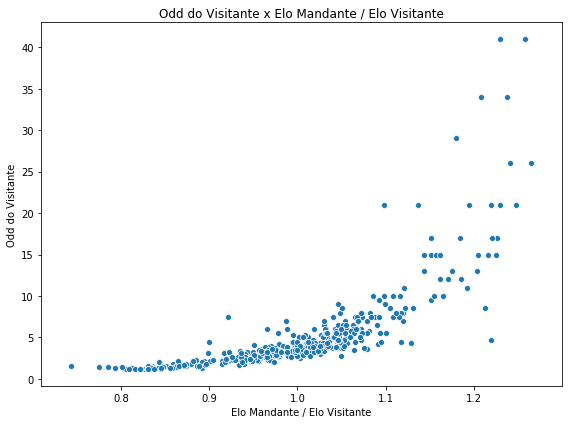

In [22]:
plt.rcParams['figure.figsize'] = [8, 6]
ax = sns.scatterplot(y='B365A', x='HomeElo/AwayElo', data=elo_df_new)
ax.set(ylabel='Odd do Visitante', xlabel='Elo Mandante / Elo Visitante', title='Odd do Visitante x Elo Mandante / Elo Visitante')
plt.tight_layout()
plt.savefig('odd_elo_score4_v2.png')
plt.show()

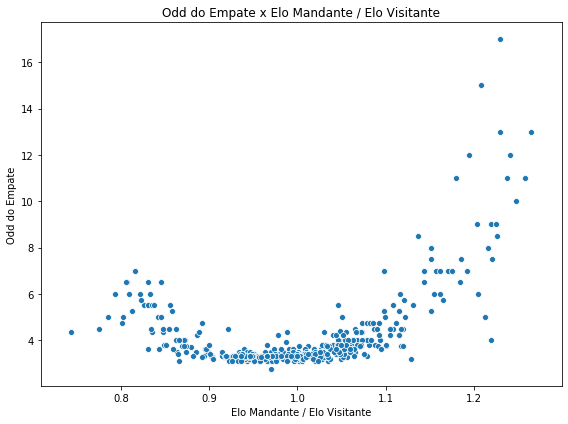

In [23]:
plt.rcParams['figure.figsize'] = [8, 6]
ax = sns.scatterplot(y='B365D', x='HomeElo/AwayElo', data=elo_df_new)
ax.set(ylabel='Odd do Empate', xlabel='Elo Mandante / Elo Visitante', title='Odd do Empate x Elo Mandante / Elo Visitante')
plt.tight_layout()
plt.savefig('odd_elo_score5_v2.png')
plt.show()

## Heatmap

In [11]:
elo_df_new[['B365H', 'B365A', 'B365D', 'away_elo', 'home_elo']].corr()

,B365H,B365A,B365D,away_elo,home_elo
B365H,1.000000,-0.375511,0.073471,0.753512,-0.325041
B365A,-0.375511,1.000000,0.851644,-0.341775,0.700327
B365D,0.073471,0.851644,1.000000,0.030475,0.629653
away_elo,0.753512,-0.341775,0.030475,1.000000,-0.049372
home_elo,-0.325041,0.700327,0.629653,-0.049372,1.000000


'Versão do matplotlib: 3.1.1'

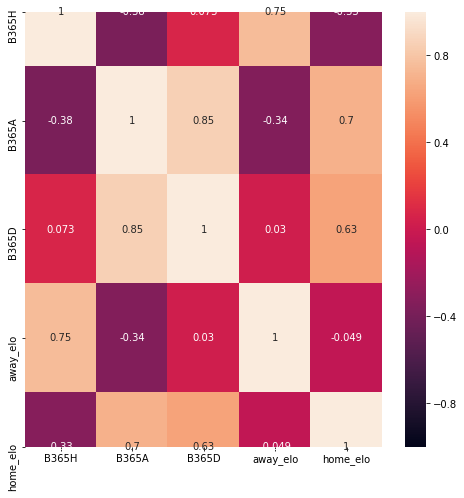

In [12]:
# https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
display(f'Versão do matplotlib: {matplotlib.__version__}')
plt.figure(figsize=(8,8))
sns.heatmap(elo_df_new[['B365H', 'B365A', 'B365D', 'away_elo', 'home_elo']].corr(),vmin=-1, vmax=1, annot=True);

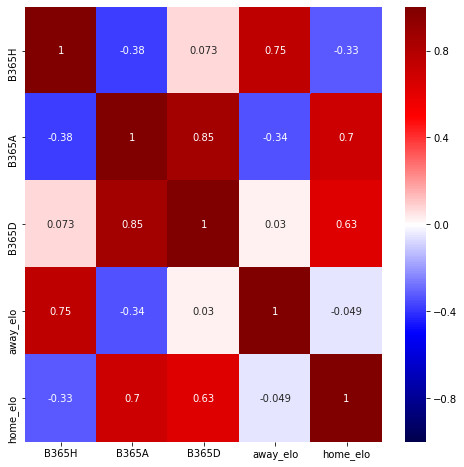

In [27]:
# https://matplotlib.org/examples/color/colormaps_reference.html
# cmap = 'coolwarm'
# cmap = 'YlGnBu'
# cmap = 'Reds'
# cmap = 'Greys'
cmap = 'seismic'

# https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

plt.figure(figsize=(8,8))
ax = sns.heatmap(elo_df_new[['B365H', 'B365A', 'B365D', 'away_elo', 'home_elo']].corr(),vmin=-1, vmax=1,
            cmap=cmap, annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [14]:
m = np.zeros_like(elo_df_new[['B365H', 'B365A', 'B365D', 'away_elo', 'home_elo']].corr(), dtype=np.bool)
m

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [15]:
np.triu_indices_from(m)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]),
 array([0, 1, 2, 3, 4, 1, 2, 3, 4, 2, 3, 4, 3, 4, 4]))

In [16]:
m[np.triu_indices_from(m)] = True

In [17]:
m

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

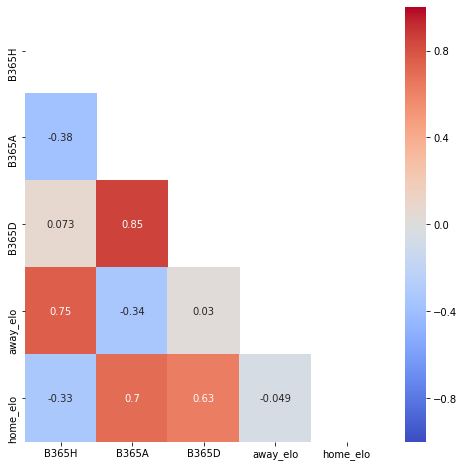

In [18]:
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b

mask = np.zeros_like(elo_df_new[['B365H', 'B365A', 'B365D', 'away_elo', 'home_elo']].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))
ax = sns.heatmap(elo_df_new[['B365H', 'B365A', 'B365D', 'away_elo', 'home_elo']].corr(),vmin=-1, vmax=1,
            cmap=cmap, annot=True, mask=mask);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);